In [1]:
!pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.1 MB/s 


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

import matplotlib.pyplot as plt
import cv2
import numpy as np
import visualkeras


In [2]:
!wget https://www.petz.com.br/blog/wp-content/uploads/2019/04/furao-de-estimacao.jpg

--2022-10-15 17:57:38--  https://www.petz.com.br/blog/wp-content/uploads/2019/04/furao-de-estimacao.jpg
Resolving www.petz.com.br (www.petz.com.br)... 179.191.187.64, 179.191.187.66
Connecting to www.petz.com.br (www.petz.com.br)|179.191.187.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45942 (45K) [image/jpeg]
Saving to: ‘furao-de-estimacao.jpg’

furao-de-estimacao. 100%[===================>]  44.87K  --.-KB/s    in 0.02s   

2022-10-15 17:57:38 (2.71 MB/s) - ‘furao-de-estimacao.jpg’ saved [45942/45942]



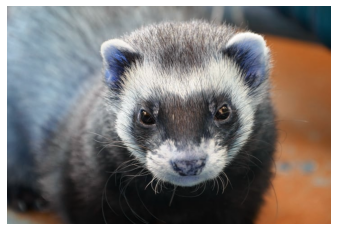

In [6]:
img = cv2.imread('/content/furao-de-estimacao.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
height, width, ch = img.shape
print(height, width, ch)

482 718 3


In [8]:
img = cv2.resize(img, (224, 224))
height, width, ch = img.shape
print(height, width, ch)

224 224 3


In [9]:
### Keras model estrutura
model = keras.Sequential()
model.add(layers.Conv2D(input_shape=(height, width, 3), filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


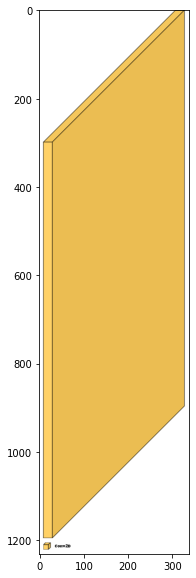

In [10]:
plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

In [11]:
def plot_featuremap():
  # Display Features Map
  plt.figure(figsize=(15,15))
  for i in range(64):  # 64 porque sao 64 filtros
      feature_img = feature_map[0, :, :, i]  
      ax = plt.subplot(8, 8, i+1)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(feature_img, cmap='gray')
  plt.show()

1/1 [==============================] - 1s 545ms/step
(1, 224, 224, 64)


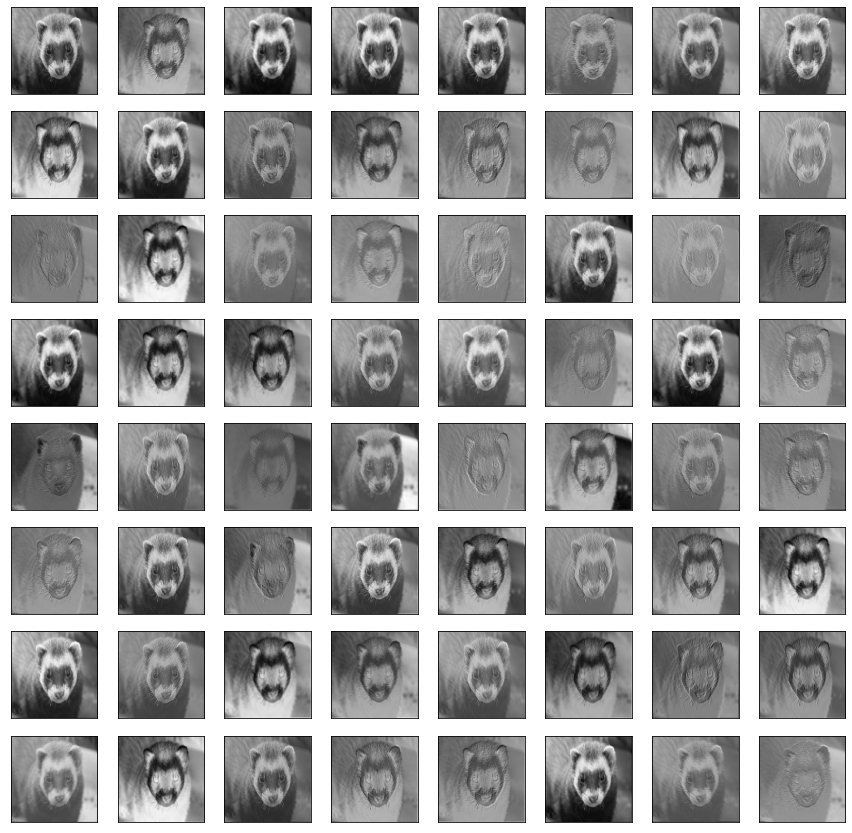

In [12]:
## Features Map -  caracteristicas extraidas pelas convolucoes feitas 

feature_map = model.predict(np.array([img]))
print(feature_map.shape)


plot_featuremap()

In [13]:
### Keras model estrutura
model = keras.Sequential()
model.add(layers.Conv2D(input_shape=(height, width, 3), filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 223, 223, 64)     0         
 )                                                               
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


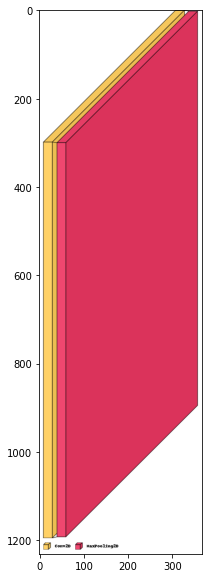

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

1/1 [==============================] - 0s 114ms/step
(1, 223, 223, 64)


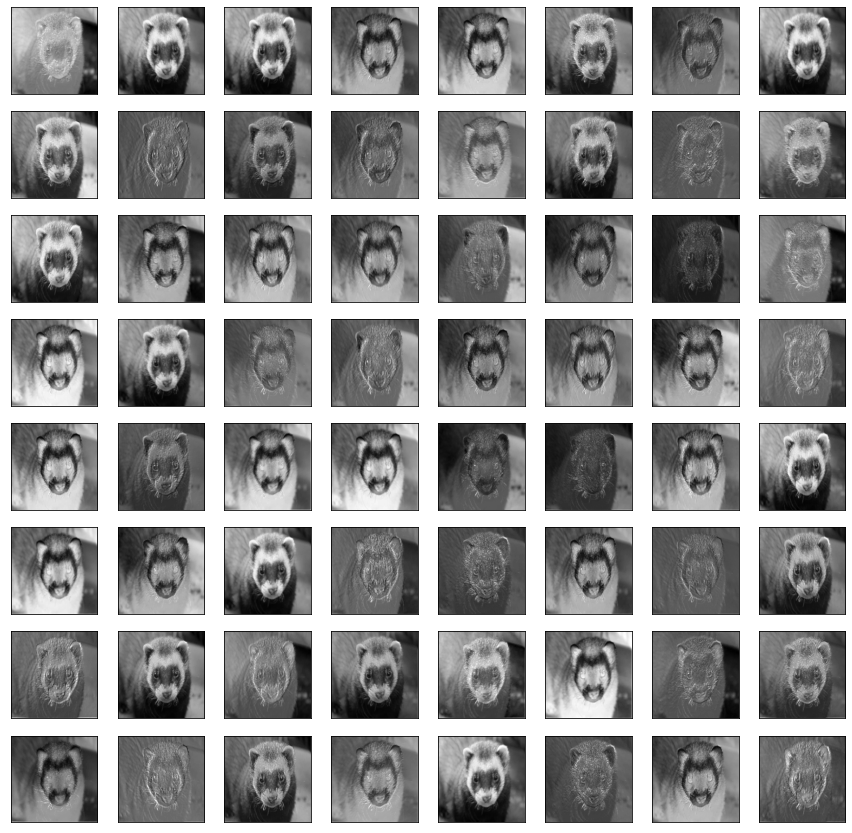

In [15]:
## Features Map -  caracteristicas extraidas pelas convolucoes feitas 

feature_map = model.predict(np.array([img]))
print(feature_map.shape)

plot_featuremap()

In [16]:

model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(height, width, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))



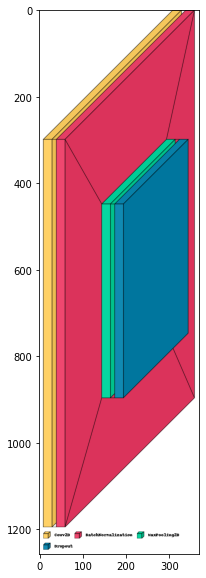

In [17]:
plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

1/1 [==============================] - 0s 79ms/step
(1, 112, 112, 32)


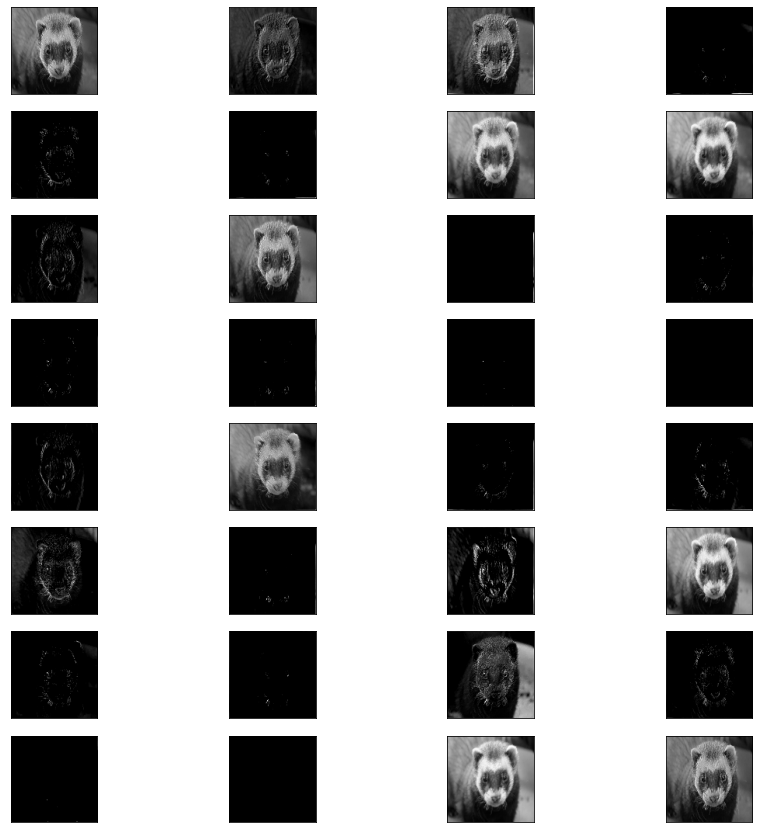

In [18]:
feature_map = model.predict(np.array([img]))
print(feature_map.shape)

# Display Features Map
plt.figure(figsize=(15,15))
for i in range(32): 
    feature_img = feature_map[0, :, :, i]  
    ax = plt.subplot(8, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_img, cmap='gray')
plt.show()

In [19]:

model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(height, width, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

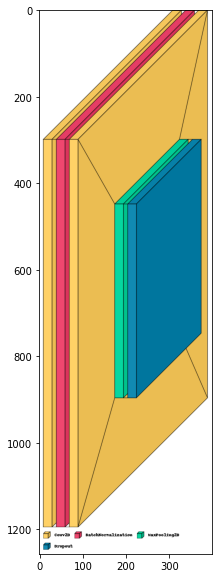

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

1/1 [==============================] - 0s 97ms/step
(1, 112, 112, 16)


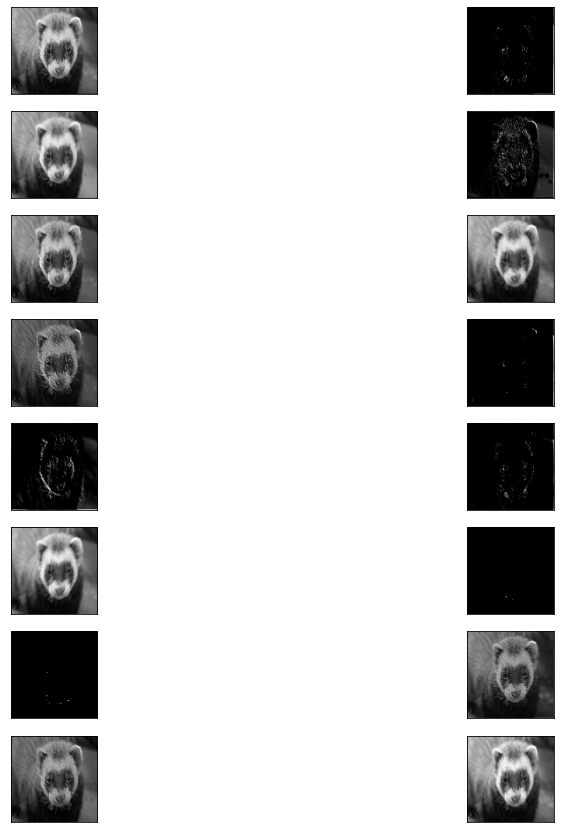

In [21]:
feature_map = model.predict(np.array([img]))
print(feature_map.shape)

# Display Features Map
plt.figure(figsize=(15,15))
for i in range(16): 
    feature_img = feature_map[0, :, :, i]  
    ax = plt.subplot(8, 2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_img, cmap='gray')
plt.show()

In [22]:

model = Sequential()
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(height, width, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))


# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))

# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))


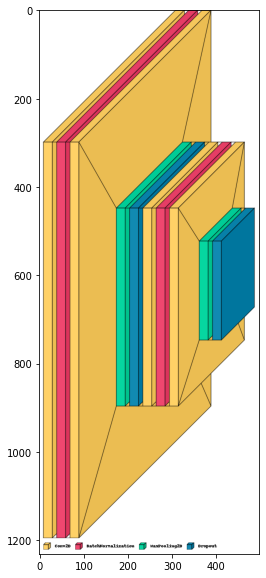

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(visualkeras.layered_view(model, legend=True))
plt.show()

1/1 [==============================] - 0s 193ms/step
(1, 56, 56, 16)


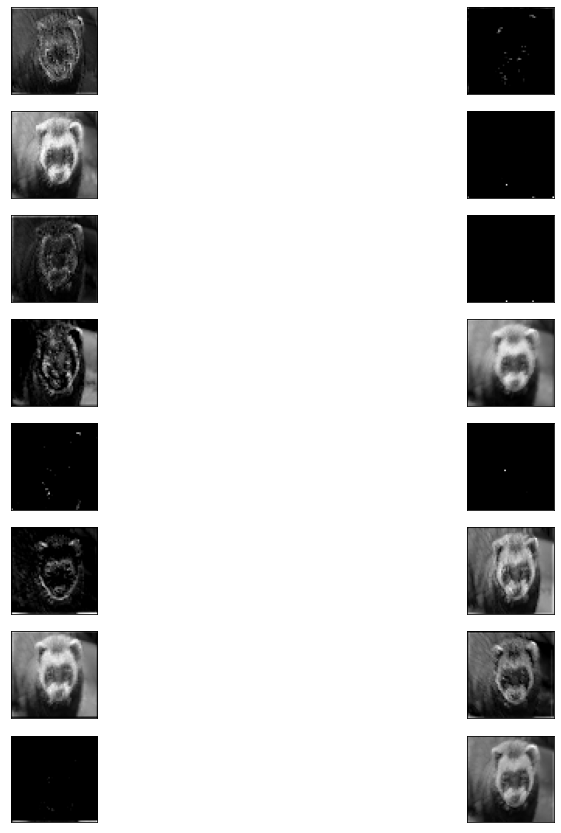

In [25]:
feature_map = model.predict(np.array([img]))
print(feature_map.shape)

# Display Features Map
plt.figure(figsize=(15,15))
for i in range(16): 
    feature_img = feature_map[0, :, :, i]  
    ax = plt.subplot(8, 2, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_img, cmap='gray')
plt.show()